<a href="https://colab.research.google.com/github/Supassara-pmp/Coursework/blob/main/Classification_Model_using_GridSearchCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classification on the “credit-g” dataset

# **1. Import 'Credit-g' Dataset**

---



In [ ]:
import pandas as pd
import numpy as np

credit_g = pd.read_csv('/content/drive/MyDrive/CS345/Assignment3/credit-g_dataset.csv')

In [ ]:
from sklearn.datasets import fetch_openml

credit = fetch_openml('credit-g')

In [ ]:
credit_g

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,residence_since,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,'<0',6,'critical/other existing credit',radio/tv,1169,'no known savings','>=7',4,'male single',none,4,'real estate',67,none,own,2,skilled,1,yes,yes,good
1,'0<=X<200',48,'existing paid',radio/tv,5951,'<100','1<=X<4',2,'female div/dep/mar',none,2,'real estate',22,none,own,1,skilled,1,none,yes,bad
2,'no checking',12,'critical/other existing credit',education,2096,'<100','4<=X<7',2,'male single',none,3,'real estate',49,none,own,1,'unskilled resident',2,none,yes,good
3,'<0',42,'existing paid',furniture/equipment,7882,'<100','4<=X<7',2,'male single',guarantor,4,'life insurance',45,none,'for free',1,skilled,2,none,yes,good
4,'<0',24,'delayed previously','new car',4870,'<100','1<=X<4',3,'male single',none,4,'no known property',53,none,'for free',2,skilled,2,none,yes,bad
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,'no checking',12,'existing paid',furniture/equipment,1736,'<100','4<=X<7',3,'female div/dep/mar',none,4,'real estate',31,none,own,1,'unskilled resident',1,none,yes,good
996,'<0',30,'existing paid','used car',3857,'<100','1<=X<4',4,'male div/sep',none,4,'life insurance',40,none,own,1,'high qualif/self emp/mgmt',1,yes,yes,good
997,'no checking',12,'existing paid',radio/tv,804,'<100','>=7',4,'male single',none,4,car,38,none,own,1,skilled,1,none,yes,good
998,'<0',45,'existing paid',radio/tv,1845,'<100','1<=X<4',4,'male single',none,4,'no known property',23,none,'for free',1,skilled,1,yes,yes,bad


In [ ]:
print("Shape of data: {}".format(credit_g.shape))


Shape of data: (1000, 21)


In [ ]:
print("Features names: \n{}".format(credit.feature_names))

Features names: 
['checking_status', 'duration', 'credit_history', 'purpose', 'credit_amount', 'savings_status', 'employment', 'installment_commitment', 'personal_status', 'other_parties', 'residence_since', 'property_magnitude', 'age', 'other_payment_plans', 'housing', 'existing_credits', 'job', 'num_dependents', 'own_telephone', 'foreign_worker']


In [ ]:
target_names = credit_g['class'].unique()
print("Target names: ", credit_g['class'].unique())
print("Shape of target: {}".format(credit_g['class'].shape))

Target names:  ['good' 'bad']
Shape of target: (1000,)


In [ ]:
print(credit_g.groupby('class').size())

class
bad     300
good    700
dtype: int64


# **2. Data Exploration and Data Visualization**

---

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt

credit_g.isna().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

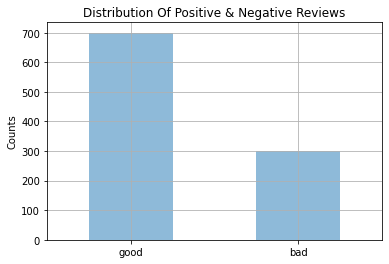

In [ ]:
credit_g['class'].value_counts().plot.bar(alpha=0.5, grid=True)
plt.title('Distribution Of Positive & Negative Reviews')
plt.xticks(rotation=0)
plt.ylabel('Counts')
plt.show()

In [ ]:
credit_g.groupby('class').describe()

duration                                   ... num_dependents                    
         count       mean        std  min   25%  ...            min  25%  50%  75%  max
class                                            ...                                   
bad      300.0  24.860000  13.282639  6.0  12.0  ...            1.0  1.0  1.0  1.0  2.0
good     700.0  19.207143  11.079564  4.0  12.0  ...            1.0  1.0  1.0  1.0  2.0

[2 rows x 56 columns]

In [ ]:
# หาค่าเฉลี่ยของ numeric feature ทั้ง 7 features
credit_g.groupby('class').mean()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
class,,,,,,,
bad,24.860000,3938.126667,3.096667,2.850000,33.963333,1.366667,1.153333
good,19.207143,2985.457143,2.920000,2.842857,36.224286,1.424286,1.155714


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


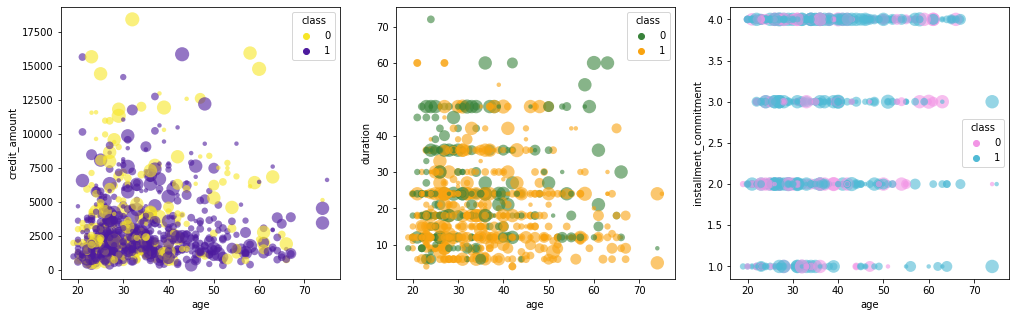

In [ ]:
import seaborn as sns

features = credit.data.T
class_credit = credit_g['class'].map({'good': 1, 'bad': 0})

plt.figure(figsize = (17, 5))
# แสดงความสัมพันธ์ระหว่างอายุ กับ วงเงิน
ax = plt.subplot(1,3,1)
sns.scatterplot(features[12], features[4], alpha=0.6, s = 20*features[3], c = class_credit, cmap='viridis', ax=ax, hue= class_credit, palette=['#F7E627', '#4D1B9E'])
plt.xlabel(credit.feature_names[12])
plt.ylabel(credit.feature_names[4])
# แสดงความสัมพันธ์ระหว่างอายุ กับ ความต่อเนื่องของเครดิต(เดือน)
ax = plt.subplot(1,3,2)
sns.scatterplot(features[12], features[1], alpha=0.6, s =20*features[3], c = class_credit, cmap='viridis', ax=ax, hue= class_credit, palette=['#38823A', '#F9A30F'])
plt.xlabel(credit.feature_names[12])
plt.ylabel(credit.feature_names[1]);
# แสดงความสัมพันธ์ระหว่างอายุ กับ อัตราการผ่อนชำระเป็นร้อยละของรายได้ที่มีการจัดการแล้ว
ax = plt.subplot(1,3,3)
sns.scatterplot(features[12], features[7], alpha=0.6, s =20*features[3], c = class_credit, cmap='viridis', ax=ax, hue= class_credit, palette=['#F295E5', '#50BAD5'])
plt.xlabel(credit.feature_names[12])
plt.ylabel(credit.feature_names[7]);

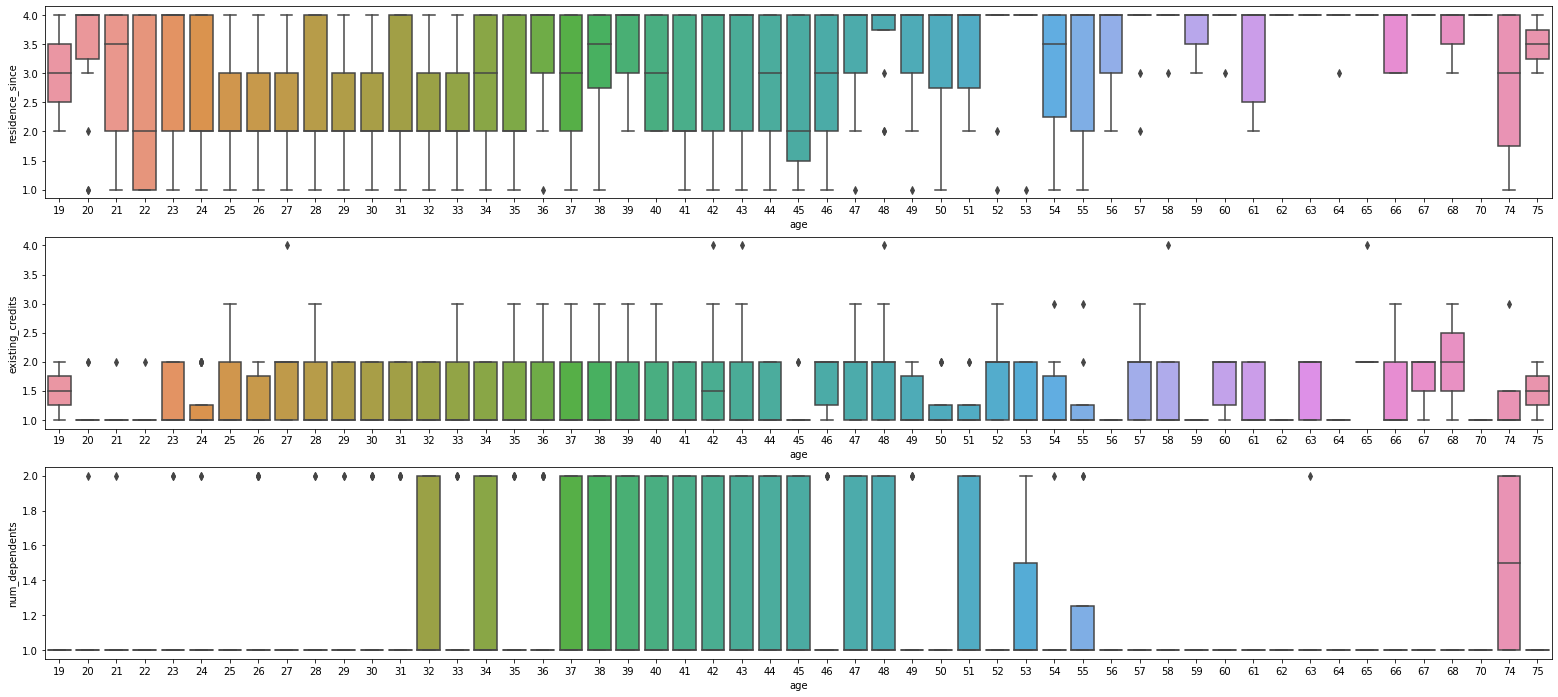

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(27, 12))

# แสดงความสัมพันธ์ระหว่างอายุ กับ เวลาที่อยู่อาศัยในที่อยู่ปัจจุบัน(ปี)
sns.boxplot(ax=axes[0], data=credit_g, x='age', y='residence_since')
# แสดงความสัมพันธ์ระหว่างอายุ กับ จำนวนสินเชื่อที่มีอยู่ที่ธนาคารนี้
sns.boxplot(ax=axes[1], data=credit_g, x='age', y='existing_credits')
# แสดงความสัมพันธ์ระหว่างอายุ กับ จำนวนผู้ที่อยู่ในการอุปการะ
sns.boxplot(ax=axes[2], data=credit_g, x='age', y='num_dependents')

In [ ]:
#แสดงค่าสถิติเครดิตจากสถานะของการตรวจสอบบัญชีที่มีอยู่ใน Deutsche Mark
credit_g.groupby('checking_status').mean()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
checking_status,,,,,,,
'0<=X<200',22.680297,3827.561338,2.877323,2.743494,34.081784,1.356877,1.115242
'<0',21.339416,3175.218978,3.058394,3.003650,35.339416,1.379562,1.189781
'>=200',17.349206,2177.650794,2.793651,2.571429,37.190476,1.317460,1.142857
'no checking',19.954315,3133.101523,3.007614,2.847716,36.426396,1.474619,1.159898


In [ ]:
#แสดงค่าสถิติเครดิตจากประวัติเครดิต ได้แก่ เครดิตที่ได้รับ ชำระคืนอย่างถูกต้อง ล่าช้า บัญชีที่สำคัญ
credit_g.groupby('credit_history').mean()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
credit_history,,,,,,,
'all paid',22.693878,3344.877551,3.122449,2.979592,36.265306,1.163265,1.265306
'critical/other existing credit',19.488055,3088.037543,3.044369,2.996587,38.436860,1.856655,1.167235
'delayed previously',26.215909,4302.602273,2.920455,2.772727,36.136364,1.670455,1.204545
'existing paid',20.111321,3040.958491,2.950943,2.760377,33.877358,1.113208,1.128302
'no credits/all paid',27.875000,5305.675000,2.675000,2.850000,34.300000,1.725000,1.175000


In [ ]:
#แสดงค่าสถิติเครดิตจากวัตถุประสงค์ของสินเชื่อ เช่น รถยนต์ โทรทัศน์
credit_g.groupby('purpose').mean()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
purpose,,,,,,,
'domestic appliance',16.833333,1498.000000,3.166667,2.666667,34.250000,1.083333,1.000000
'new car',18.504274,3063.025641,2.880342,2.884615,37.089744,1.444444,1.222222
'used car',26.058252,5370.223301,2.660194,3.194175,37.252427,1.398058,1.213592
business,26.938144,4158.041237,2.886598,2.680412,35.484536,1.556701,1.154639
education,21.100000,3180.400000,3.180000,3.040000,38.940000,1.380000,1.220000
furniture/equipment,19.292818,3066.988950,2.823204,2.828729,32.458564,1.320442,1.088398
other,32.333333,8209.333333,2.666667,3.250000,39.916667,1.500000,1.166667
radio/tv,20.046429,2487.653571,3.221429,2.685714,34.700000,1.378571,1.107143
repairs,19.090909,2728.090909,3.272727,3.045455,38.545455,1.681818,1.227273


In [ ]:
#แสดงค่าสถิติเครดิตจากสถานะของบัญชีออมทรัพย์/พันธบัตร ใน Deutsche Mark
credit_g.groupby('savings_status').mean()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
savings_status,,,,,,,
'100<=X<500',22.737864,3384.038835,2.922330,2.902913,33.019417,1.388350,1.155340
'500<=X<1000',19.031746,2572.111111,2.873016,2.984127,36.904762,1.269841,1.142857
'<100',20.441128,3187.832504,2.965174,2.764511,35.139303,1.422886,1.149254
'>=1000',18.312500,2573.395833,3.145833,2.833333,37.166667,1.500000,1.145833
'no known savings',22.715847,3906.409836,3.016393,3.032787,37.415301,1.387978,1.180328


In [ ]:
#แสดงค่าสถิติเครดิตจากการจ้างงานปัจจุบันในหลายปีที่ผ่านมา
credit_g.groupby('employment').mean()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
employment,,,,,,,
'1<=X<4',20.365782,3125.286136,2.864307,2.628319,33.085546,1.348083,1.138643
'4<=X<7',22.994253,3601.695402,2.971264,2.770115,33.477011,1.454023,1.172414
'<1',19.401163,2952.453488,2.889535,2.447674,30.308140,1.284884,1.116279
'>=7',21.264822,3224.624506,3.229249,3.418972,42.628458,1.529644,1.205534
unemployed,20.661290,4216.758065,2.758065,3.000000,40.435484,1.435484,1.096774


In [ ]:
#แสดงค่าสถิติเครดิตจากสถานภาพส่วนบุคคล ได้แก่ แต่งงานแล้ว โสด หย่าร้าง และเพศ
credit_g.groupby('personal_status').mean()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
personal_status,,,,,,,
'female div/dep/mar',19.438710,2877.774194,2.829032,2.867742,32.803226,1.325806,1.045161
'male div/sep',21.240000,3684.700000,2.500000,2.660000,38.640000,1.340000,1.060000
'male mar/wid',17.706522,2045.543478,3.000000,2.489130,30.347826,1.347826,1.021739
'male single',22.237226,3661.903285,3.093066,2.908759,37.687956,1.468978,1.248175


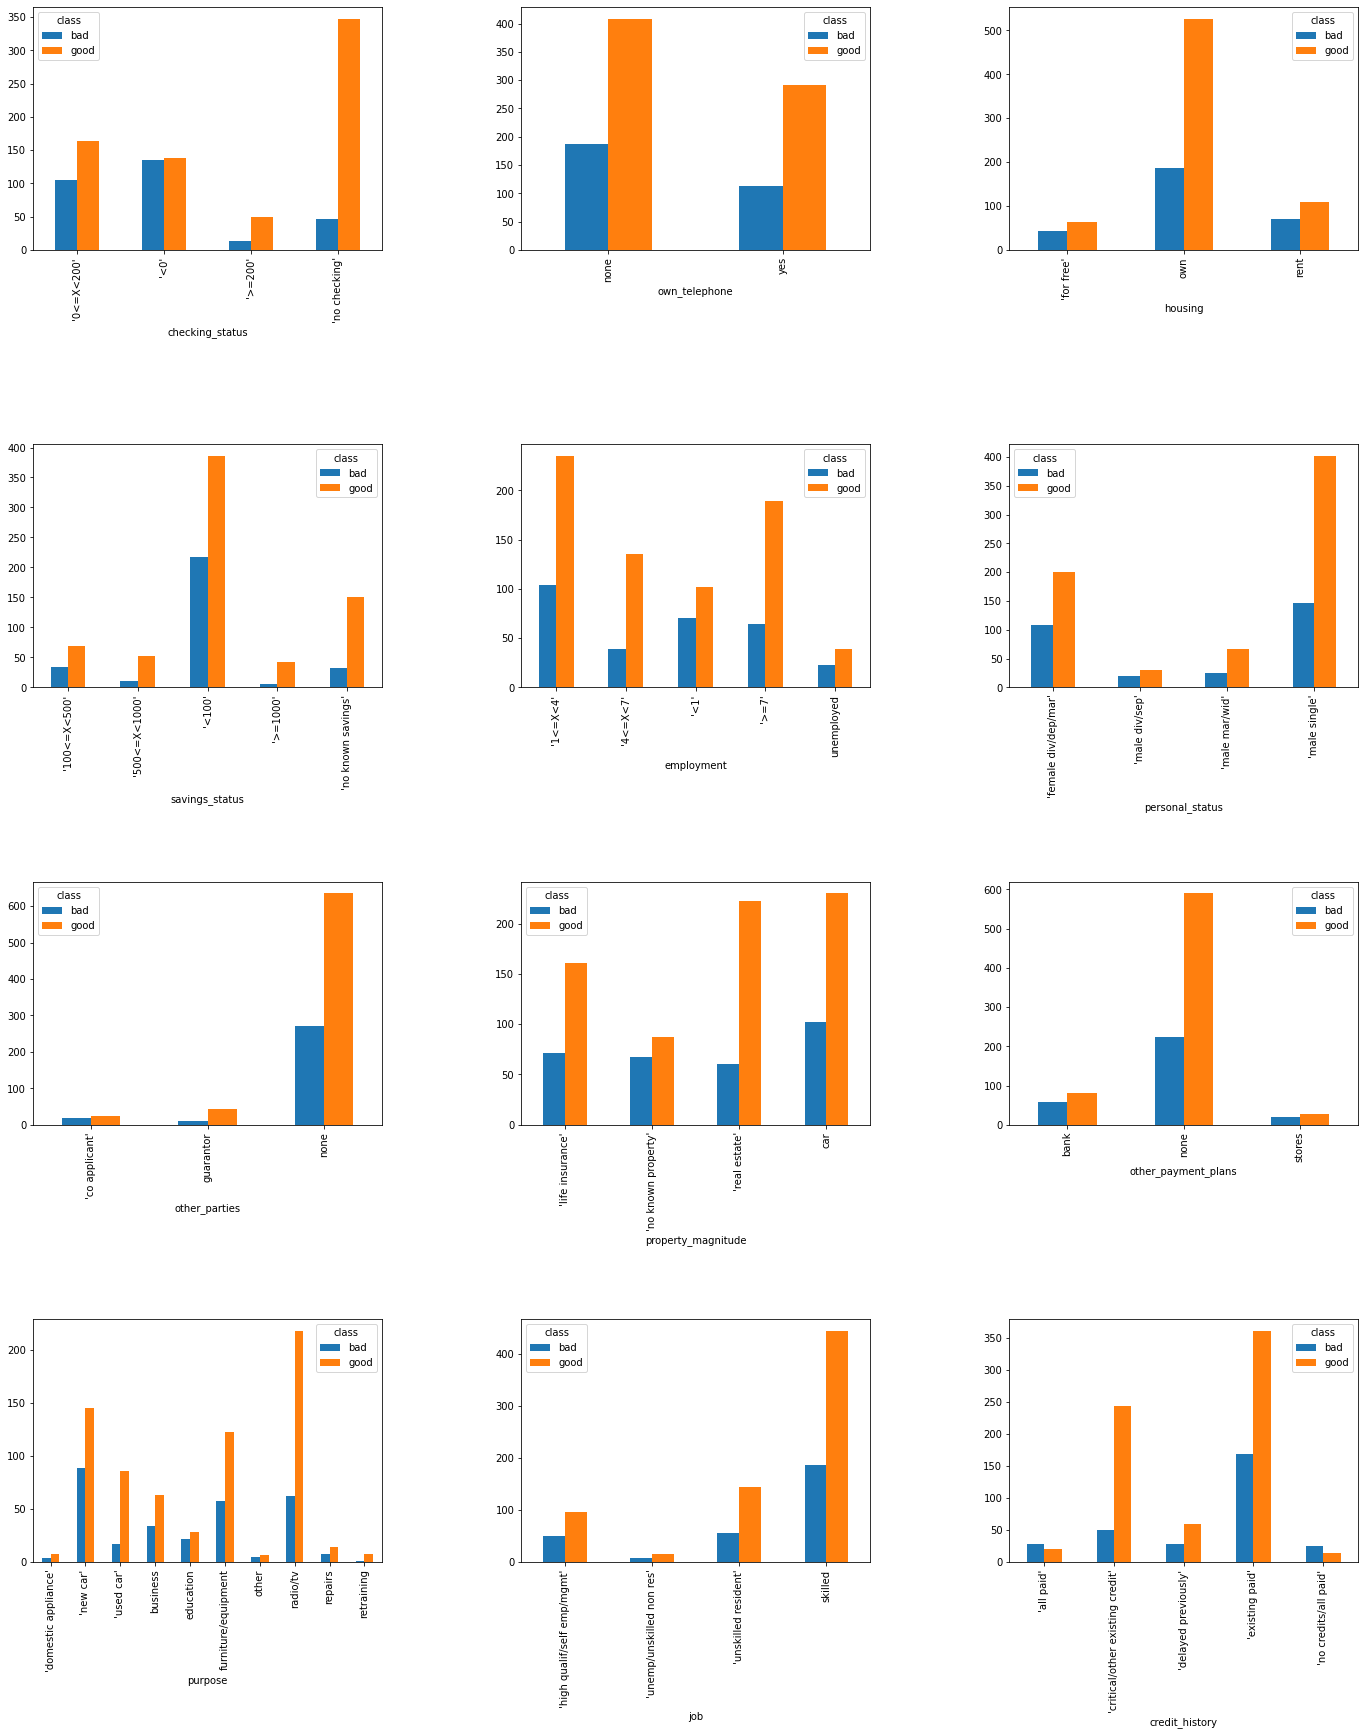

In [ ]:
#แสดงจำนวน good credits และ bad credits ของแต่ละ categorical features
fig, axes = plt.subplots(4, 3, figsize=(23,27))
plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.8)

pd.crosstab(credit_g.checking_status, credit_g['class']).plot(ax=axes[0,0], kind='bar')

pd.crosstab(credit_g.own_telephone, credit_g['class']).plot(ax=axes[0,1], kind='bar')

pd.crosstab(credit_g.housing, credit_g['class']).plot(ax=axes[0,2], kind='bar')

pd.crosstab(credit_g.savings_status, credit_g['class']).plot(ax=axes[1,0], kind='bar')

pd.crosstab(credit_g.employment, credit_g['class']).plot(ax=axes[1,1], kind='bar')

pd.crosstab(credit_g.personal_status, credit_g['class']).plot(ax=axes[1,2], kind='bar')

pd.crosstab(credit_g.other_parties, credit_g['class']).plot(ax=axes[2,0], kind='bar')

pd.crosstab(credit_g.property_magnitude, credit_g['class']).plot(ax=axes[2,1], kind='bar')

pd.crosstab(credit_g.other_payment_plans, credit_g['class']).plot(ax=axes[2,2], kind='bar')

pd.crosstab(credit_g.purpose, credit_g['class']).plot(ax=axes[3,0], kind='bar')

pd.crosstab(credit_g.job, credit_g['class']).plot(ax=axes[3,1], kind='bar')

pd.crosstab(credit_g.credit_history, credit_g['class']).plot(ax=axes[3,2], kind='bar')

# **3. Data Preprocessing**

---

##  ต้องการรู้ว่า features ไหนเป็น categorical variables บ้าง


In [ ]:
credit.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'DESCR', 'details', 'categories', 'url'])

In [ ]:
credit.categories.values()

dict_values([['<0', '0<=X<200', '>=200', 'no checking'], ['no credits/all paid', 'all paid', 'existing paid', 'delayed previously', 'critical/other existing credit'], ['new car', 'used car', 'furniture/equipment', 'radio/tv', 'domestic appliance', 'repairs', 'education', 'vacation', 'retraining', 'business', 'other'], ['<100', '100<=X<500', '500<=X<1000', '>=1000', 'no known savings'], ['unemployed', '<1', '1<=X<4', '4<=X<7', '>=7'], ['male div/sep', 'female div/dep/mar', 'male single', 'male mar/wid', 'female single'], ['none', 'co applicant', 'guarantor'], ['real estate', 'life insurance', 'car', 'no known property'], ['bank', 'stores', 'none'], ['rent', 'own', 'for free'], ['unemp/unskilled non res', 'unskilled resident', 'skilled', 'high qualif/self emp/mgmt'], ['none', 'yes'], ['yes', 'no']])

In [ ]:
#12 features ที่เป็น categorical variables
categorical_var = credit.categories.keys()
categorical_var

dict_keys(['checking_status', 'credit_history', 'purpose', 'savings_status', 'employment', 'personal_status', 'other_parties', 'property_magnitude', 'other_payment_plans', 'housing', 'job', 'own_telephone', 'foreign_worker'])

In [ ]:
pip install category_encoders


## ใช้ OneHotEncoder ในการแปลงข้อมูล Categorical Variables ให้เป็นตัวเลข

In [ ]:
from category_encoders import OneHotEncoder
#แปลงคอลัมน์ของ features ที่เป็น categorical variables ให้เป็นตัวเลข
encoding = OneHotEncoder(cols = categorical_var).fit(credit_g)
credit_g = encoding.transform(credit_g)
#แปลงค่าใน target จาก good->1, bad->2
credit_g['class'] = credit_g['class'].map({'good': 1, 'bad': 0})
credit_g


/usr/local/lib/python3.7/dist-packages/category_encoders/utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


,checking_status_1,checking_status_2,checking_status_3,checking_status_4,duration,credit_history_1,credit_history_2,credit_history_3,credit_history_4,credit_history_5,purpose_1,purpose_2,purpose_3,purpose_4,purpose_5,purpose_6,purpose_7,purpose_8,purpose_9,purpose_10,credit_amount,savings_status_1,savings_status_2,savings_status_3,savings_status_4,savings_status_5,employment_1,employment_2,employment_3,employment_4,employment_5,installment_commitment,personal_status_1,personal_status_2,personal_status_3,personal_status_4,other_parties_1,other_parties_2,other_parties_3,residence_since,property_magnitude_1,property_magnitude_2,property_magnitude_3,property_magnitude_4,age,other_payment_plans_1,other_payment_plans_2,other_payment_plans_3,housing_1,housing_2,housing_3,existing_credits,job_1,job_2,job_3,job_4,num_dependents,own_telephone_1,own_telephone_2,foreign_worker_1,foreign_worker_2,class
0,1,0,0,0,6,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1169,1,0,0,0,0,1,0,0,0,0,4,1,0,0,0,1,0,0,4,1,0,0,0,67,1,0,0,1,0,0,2,1,0,0,0,1,1,0,1,0,1
1,0,1,0,0,48,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,5951,0,1,0,0,0,0,1,0,0,0,2,0,1,0,0,1,0,0,2,1,0,0,0,22,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,0
2,0,0,1,0,12,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2096,0,1,0,0,0,0,0,1,0,0,2,1,0,0,0,1,0,0,3,1,0,0,0,49,1,0,0,1,0,0,1,0,1,0,0,2,0,1,1,0,1
3,1,0,0,0,42,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,7882,0,1,0,0,0,0,0,1,0,0,2,1,0,0,0,0,1,0,4,0,1,0,0,45,1,0,0,0,1,0,1,1,0,0,0,2,0,1,1,0,1
4,1,0,0,0,24,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,4870,0,1,0,0,0,0,1,0,0,0,3,1,0,0,0,1,0,0,4,0,0,1,0,53,1,0,0,0,1,0,2,1,0,0,0,2,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,1,0,12,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1736,0,1,0,0,0,0,0,1,0,0,3,0,1,0,0,1,0,0,4,1,0,0,0,31,1,0,0,1,0,0,1,0,1,0,0,1,0,1,1,0,1
996,1,0,0,0,30,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,3857,0,1,0,0,0,0,1,0,0,0,4,0,0,1,0,1,0,0,4,0,1,0,0,40,1,0,0,1,0,0,1,0,0,1,0,1,1,0,1,0,1
997,0,0,1,0,12,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,804,0,1,0,0,0,1,0,0,0,0,4,1,0,0,0,1,0,0,4,0,0,0,1,38,1,0,0,1,0,0,1,1,0,0,0,1,0,1,1,0,1
998,1,0,0,0,45,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1845,0,1,0,0,0,0,1,0,0,0,4,1,0,0,0,1,0,0,4,0,0,1,0,23,1,0,0,0,1,0,1,1,0,0,0,1,1,0,1,0,0


# **4. แบ่งข้อมูลเป็น Trainig set และ Test set**

---

In [ ]:
from sklearn.model_selection import train_test_split

X = credit_g.iloc[:, :61]
y = credit_g['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21)

In [ ]:
print("Training set predictions: {}".format(X_train.shape))
print("\nTest set predictions: {}".format(X_test.shape))
print("\nTraining set target: {}".format(y_train.shape))
print("\nTest set target: {}".format(y_test.shape))


Training set predictions: (750, 61)

Test set predictions: (250, 61)

Training set target: (750,)

Test set target: (250,)


# **5. Modeling by default parameters**

---

In [ ]:
import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.simplefilter(action='ignore', category=ConvergenceWarning)

##  Logistic Regression


In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression() #by default parameters
logreg.fit(X_train, y_train)

print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(logreg.score(X_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.77
Accuracy of Logistic regression classifier on test set: 0.78


In [ ]:
#Test set มีค่า accuracy มากกว่า Trainig set -> model underfitting

In [ ]:
#ค่า intercept และ coeffients ของโมเดลนี้
print('Linear model intercept (b): {}'.format(logreg.intercept_))
print('Linear model coeff (w): \n{}'.format(logreg.coef_))

Linear model intercept (b): [0.23083994]
Linear model coeff (w): 
[[-6.90292823e-01 -3.47849381e-01  1.19492325e+00  6.93327773e-02
  -1.96855659e-02  5.85160155e-01  1.16150797e-01  6.27919626e-02
  -2.65205955e-01 -2.72783132e-01  3.88926803e-01 -1.45343937e-01
   6.22184169e-02 -5.26978578e-01  4.81203271e-01 -4.07601017e-02
   1.22126961e-02 -9.63751313e-02  4.46684700e-02  4.63419184e-02
  -1.16262641e-04  4.17005428e-01 -4.26596270e-01  5.49066506e-02
   2.28158697e-01 -4.73606776e-02  1.90037107e-01  2.20014165e-02
   4.05095553e-01 -1.75343136e-01 -2.15677114e-01 -1.87261600e-01
   2.77891882e-01 -4.75741809e-02 -1.08961130e-01  1.04757256e-01
   3.84191222e-02  3.47853487e-01 -1.60158782e-01  1.37730555e-02
   3.08303096e-01  8.83164696e-02 -2.31488279e-01  6.09825413e-02
   2.34442560e-02  5.16632782e-01 -1.41049977e-01 -1.49468977e-01
   3.65418831e-01 -3.29892736e-02 -1.06315730e-01 -6.61178578e-02
   6.84870716e-03  4.41406090e-02  1.67360469e-01  7.76404280e-03
   1.23065

##  Linear Support Vector Machines (SVMs)


In [ ]:
from sklearn.svm import LinearSVC

svc = LinearSVC(random_state=21) #by default parameters
svc.fit(X_train, y_train)

print('Accuracy of Linear SVMs classifier on training set: {:.2f}'
      .format(svc.score(X_train, y_train)))
print('Accuracy of Linear SVMs classifier on test set: {:.2f}'
      .format(svc.score(X_test, y_test)))

Accuracy of Linear SVMs classifier on training set: 0.70
Accuracy of Linear SVMs classifier on test set: 0.72


In [ ]:
#Test set มีค่า accuracy มากกว่า Trainig set -> model underfitting

In [ ]:
#ค่า intercept และ coeffients ของโมเดลนี้
print('Linear model intercept (b): {}'.format(svc.intercept_))
print('Linear model coeff (w): \n{}'.format(svc.coef_))

Linear model intercept (b): [0.00599923]
Linear model coeff (w): 
[[-0.03501147 -0.00060897  0.0412205   0.00039917 -0.02734588  0.02041143
  -0.0012728   0.00380163 -0.00522428 -0.01171675  0.01250822 -0.0132325
   0.0048772  -0.00943454  0.00248755  0.00209029  0.00361814 -0.00093479
  -0.00042801  0.00444767  0.00022433  0.00910282 -0.00152666  0.0014319
   0.00537373 -0.00838255  0.00977615  0.01815754  0.00079775 -0.01226597
  -0.01046624 -0.00288405  0.00062039 -0.01237449  0.00107258  0.01668075
   0.00038555  0.01017202 -0.00455834  0.00083227  0.02767899 -0.00230198
  -0.00730334 -0.01207443  0.01862387  0.02065636 -0.00744701 -0.00721012
   0.00369366 -0.00328934  0.00559491  0.02583965  0.00074443  0.00765822
   0.00303843 -0.00544185 -0.0029356   0.0184753  -0.01247607  0.00141649
   0.00458274]]


##  k-Nearest Neighbors (k-NN)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier() #by default parameters
knn.fit(X_train, y_train)

print('Accuracy of k-NN algorithm on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy of k-NN algorithm on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))

Accuracy of k-NN algorithm on training set: 0.77
Accuracy of k-NN algorithm on test set: 0.61


In [ ]:
#Training set มีค่า accuracy มากกว่า Test set อยู่เยอะ -> model overfitting

##  เปรียบเทียบ Performace ของแต่ละ model


In [ ]:
print('1.Logistic Regression Classifier Model')
print('Accuracy on training set: {:.2f}'
      .format(logreg.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}\n'
      .format(logreg.score(X_test, y_test)))

print('2.Linear SVMs Classifier Model')
print('Accuracy on training set: {:.2f}'
      .format(svc.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}\n'
      .format(svc.score(X_test, y_test)))

print('3.k-Nearest Neighbors Model')
print('Accuracy on training set: {:.2f}'
      .format(knn.score(X_train, y_train)))
print('Accuracy on test set: {:.2f}'
      .format(knn.score(X_test, y_test)))


1.Logistic Regression Classifier Model
Accuracy on training set: 0.77
Accuracy on test set: 0.78

2.Linear SVMs Classifier Model
Accuracy on training set: 0.70
Accuracy on test set: 0.72

3.k-Nearest Neighbors Model
Accuracy on training set: 0.77
Accuracy on test set: 0.61


In [ ]:
#โมเดลทั้ง 3 อันมีค่า accuracy ยังไม่สูงนัก
#Logistic regression มีความ underfit น้อยกว่า Linear SVMs แต่ kNN มีความ Overfit มาก

Text(0.5, 1.0, 'Training and Test Accuracies')

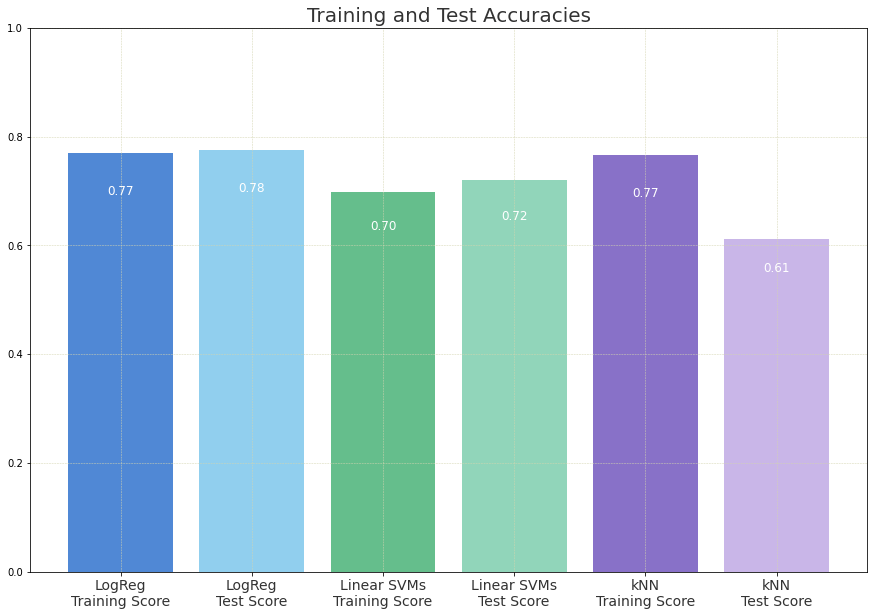

In [ ]:
scores = [logreg.score(X_train, y_train), logreg.score(X_test, y_test), svc.score(X_train, y_train), svc.score(X_test, y_test), knn.score(X_train, y_train), knn.score(X_test, y_test)]

plt.figure(figsize=(15,10))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
bars = plt.bar(np.arange(6), scores, color=['#5088D5','#91CFEE','#65BE8C','#91D5BA','#8871C8','#C9B6E8'])
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), ha='center', color='w', fontsize=12)

plt.xticks([0,1,2,3,4,5], ['LogReg\nTraining Score', 'LogReg\nTest Score','Linear SVMs\nTraining Score', 'Linear SVMs\nTest Score','kNN\nTraining Score', 'kNN\nTest Score'], alpha=0.8, fontsize=14)
plt.ylim(0.0,1.0)
plt.title('Training and Test Accuracies', alpha=0.8, fontsize=20)

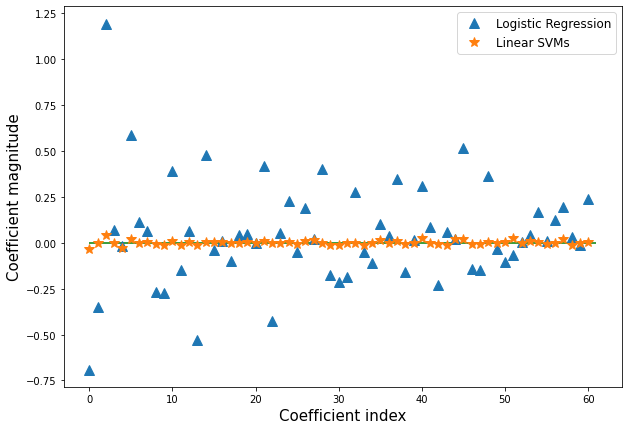

In [ ]:
#แสดงค่าน้ำหนักของแต่ละ feature(coefficient)ใน Logistic Regression และ Linear SVMs models
logreg_coef_ = logreg.coef_.reshape(61,)
svc_coef_ = svc.coef_.reshape(61,)

plt.figure(figsize=(10,7))
plt.plot(logreg_coef_, '^', label = 'Logistic Regression', ms=10)
plt.plot(svc_coef_, '*', label = 'Linear SVMs', ms=10)

plt.hlines(0, 0, len(logreg_coef_), linestyles='solid', colors='g')

plt.xlabel("Coefficient index", fontsize = 15)
plt.ylabel("Coefficient magnitude", fontsize = 15)
plt.legend(fontsize = 12)

In [ ]:
# จากรูปจะเห็นว่าค่า coeff ของ Logistic Regression มีการกระจายตัวค่าไม่ทำกัน
# จึงควรทำ Feature Normalization เพื่อให้โมเดลมีความ regularization มากยิ่งขึ้น

# **6. Feature Scaling by StandardScaler**

---

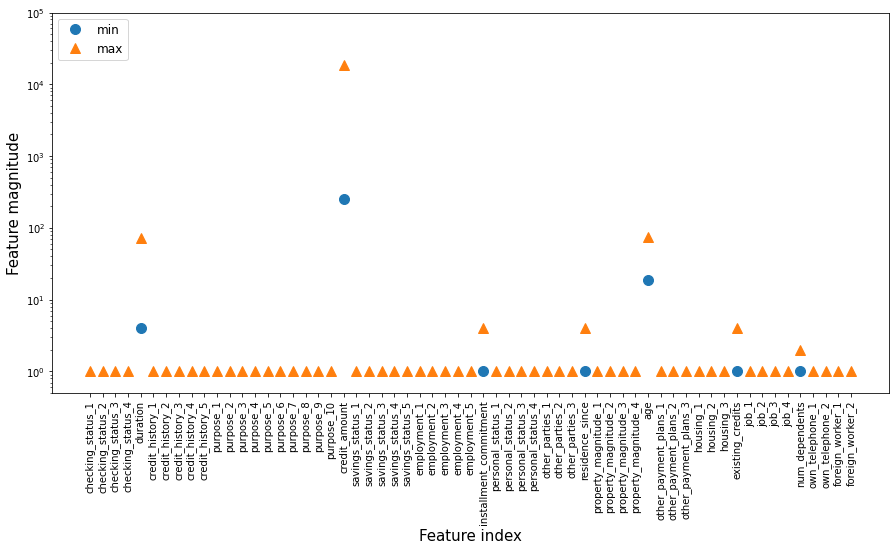

In [ ]:
plt.figure(figsize=(15,7))
plt.plot(X_train.min(axis=0),'o', label="min", ms = 10)
plt.plot(X_train.max(axis=0), '^', label="max", ms = 10)

plt.legend(loc=2, fontsize = 12)
plt.xlabel("Feature index", fontsize = 15)
plt.ylabel("Feature magnitude", fontsize = 15)
plt.xticks(rotation=90)
plt.ylim((0.5,100000))
plt.yscale("log")

In [ ]:
# จากรูปจะเห็นได้ว่าในแต่ละ featureทั้ง 61 features มีสเกลของข้อมูลที่ไม่เท่ากัน
# จึงควร Feature Scaling เพื่อให้สเกลของแต่ละ feature มีขนาดใกล้เคียงกัน

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

##  Logistic Regression with Feature Normalization


In [ ]:
#ทำ linear model หลังปรับสเกลของ feature
logreg_scaled = LogisticRegression()
logreg_scaled.fit(X_train_scaled, y_train)

print('After scaling training and test sets')
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(logreg_scaled.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(logreg_scaled.score(X_test_scaled, y_test)))

After scaling training and test sets
Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.76


In [ ]:
#Training set มีค่า accuracy ห่างจาก Test set น้อย -> model มีความ regularized แต่ค่า accuracy ยังไม่ดีเท่าไหร่

In [ ]:
#ค่า intercept และ coeffients ของโมเดลนี้
print('Linear model intercept (b): {}'.format(logreg_scaled.intercept_))
print('Linear model coeff (w): \n{}'.format(logreg_scaled.coef_))

Linear model intercept (b): [1.22041526]
Linear model coeff (w): 
[[-0.33977011 -0.20738914  0.505794   -0.00771115 -0.27038996  0.29108417
  -0.14671431  0.06464964 -0.13207272 -0.22162546  0.10716948 -0.09746356
   0.02601665 -0.29330498  0.23159474  0.0111378   0.02333003 -0.0918969
   0.10336741  0.11750342 -0.51866846  0.12587813 -0.20535505 -0.05539171
   0.29000487  0.01054297  0.08646471 -0.04294737  0.18340383 -0.1816687
  -0.11723581 -0.4134804   0.12007296 -0.07227604 -0.09415014 -0.02202015
  -0.04919818  0.22402134 -0.1779883   0.01284025  0.09040287  0.00446261
  -0.22311283  0.0833219   0.17084833  0.12001044 -0.09256005 -0.06790869
   0.05497778  0.12312437 -0.16399535 -0.1610258  -0.06467785 -0.05208539
   0.10437197  0.10976641 -0.05760863  0.04779224 -0.04779224 -0.15245645
   0.15245645]]


Text(0.5, 1.0, 'Training and Test Accuracy')

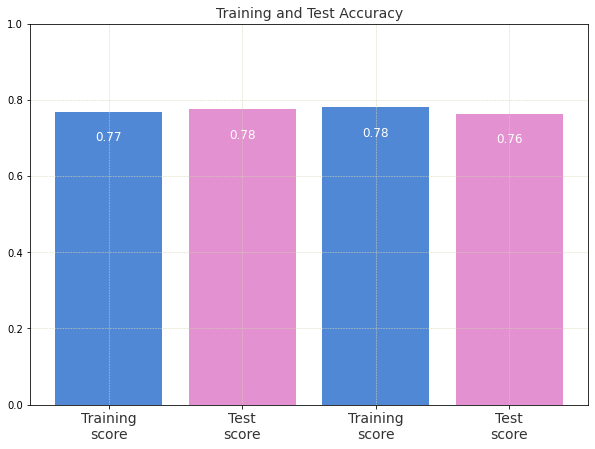

In [ ]:
scores = [logreg.score(X_train, y_train), logreg.score(X_test, y_test), logreg_scaled.score(X_train_scaled, y_train), logreg_scaled.score(X_test_scaled, y_test)]

plt.figure(figsize=(10,7))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
bars = plt.bar(np.arange(4), scores, color=['#5088D5','#E391D1','#5088D5','#E391D1'])
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), ha='center', color='w', fontsize=12)

plt.xticks([0,1,2,3], ['Training\nscore', 'Test\nscore','Training\nscore', 'Test\nscore'], alpha=0.8, fontsize=14)
plt.ylim(0.0,1.0)
plt.title('Training and Test Accuracy', alpha=0.8, fontsize=14)

In [ ]:
# โมเดลก่อนที่จะปรับสเกลมีความ underfit อยู่
# โมเดลหลังจากปรับสเกลแล้วพบว่า ค่า accuracy ของ Trainig score เพิ่มขึ้น แต่ Test set ลดลง -> model overfitting

##  Linear Support Vector Machines (SVMs) with Feature Normalization


In [ ]:
#ทำ linear model หลังปรับสเกลของ feature
svc_scaled = LinearSVC()
svc_scaled.fit(X_train_scaled, y_train)

print('After scaling training and test sets')
print('Accuracy of Linear SVMs classifier on training set: {:.2f}'
      .format(svc_scaled.score(X_train_scaled, y_train)))
print('Accuracy of Linear SVMs classifier on test set: {:.2f}'
      .format(svc_scaled.score(X_test_scaled, y_test)))

After scaling training and test sets
Accuracy of Linear SVMs classifier on training set: 0.78
Accuracy of Linear SVMs classifier on test set: 0.78


In [ ]:
#Training set มีค่า accuracy เท่ากับ Test set -> model มีความ regularized แต่ค่า accuracy ยังไม่ดีเท่าไหร่

In [ ]:
#ค่า intercept และ coeffients ของโมเดลนี้
print('Linear model intercept (b): {}'.format(svc_scaled.intercept_))
print('Linear model coeff (w): \n{}'.format(svc_scaled.coef_))

Linear model intercept (b): [0.43565741]
Linear model coeff (w): 
[[-0.12281615 -0.06752685  0.17130142  0.00698868 -0.09234552  0.10626507
  -0.04930553  0.02498478 -0.05573342 -0.08525591  0.03781794 -0.04140331
   0.01492267 -0.10951879  0.08326511  0.00541738  0.00903067 -0.0324928
   0.04251034  0.04286322 -0.18718777  0.04715803 -0.07145381 -0.01412607
   0.08970407  0.00335237  0.0352325  -0.01429785  0.06246214 -0.07096327
  -0.04128071 -0.14924086  0.0393059  -0.02804314 -0.03351744  0.00201004
  -0.01659805  0.08069418 -0.0657479   0.00240925  0.03223558 -0.00062105
  -0.0753842   0.02838781  0.06373868  0.04023231 -0.02952374 -0.02513697
   0.02040962  0.04037968 -0.05657875 -0.05730832 -0.02431273 -0.01726797
   0.03649247  0.04164551 -0.01373239  0.01545734 -0.01545734 -0.05688227
   0.05688227]]


Text(0.5, 1.0, 'Training and Test Accuracy')

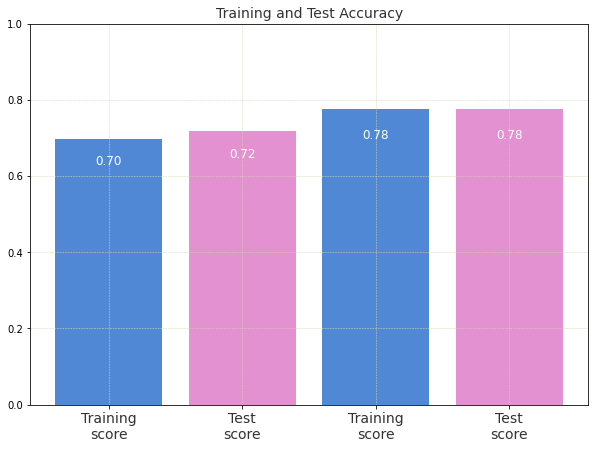

In [ ]:
scores = [svc.score(X_train, y_train), svc.score(X_test, y_test), svc_scaled.score(X_train_scaled, y_train), svc_scaled.score(X_test_scaled, y_test)]

plt.figure(figsize=(10,7))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
bars = plt.bar(np.arange(4), scores, color=['#5088D5','#E391D1','#5088D5','#E391D1'])
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), ha='center', color='w', fontsize=12)

plt.xticks([0,1,2,3], ['Training\nscore', 'Test\nscore','Training\nscore', 'Test\nscore'], alpha=0.8, fontsize=14)
plt.ylim(0.0,1.0)
plt.title('Training and Test Accuracy', alpha=0.8, fontsize=14)

In [ ]:
# โมเดลก่อนที่จะปรับสเกลมีความ underfit อยู่
# โมเดลหลังจากปรับสเกลแล้วพบว่า ค่า accuracy ของ Trainig score และ Test set เพิ่มขึ้น
# -> model regularized มากขึ้น

##  k-Nearest Neighbors (k-NN) with Feature Normalization


In [ ]:
knn_scaled = KNeighborsClassifier()
knn_scaled.fit(X_train_scaled, y_train)

print('After scaling training and test sets')
print('Accuracy of k-NN algorithm on training set: {:.2f}'
      .format(knn_scaled.score(X_train_scaled, y_train)))
print('Accuracy of k-NN algorithm on test set: {:.2f}'
      .format(knn_scaled.score(X_test_scaled, y_test)))

After scaling training and test sets
Accuracy of k-NN algorithm on training set: 0.80
Accuracy of k-NN algorithm on test set: 0.74


In [ ]:
#Training set มีค่า accuracy มากกว่า Test set -> model overfitting

Text(0.5, 1.0, 'Training and Test Accuracy')

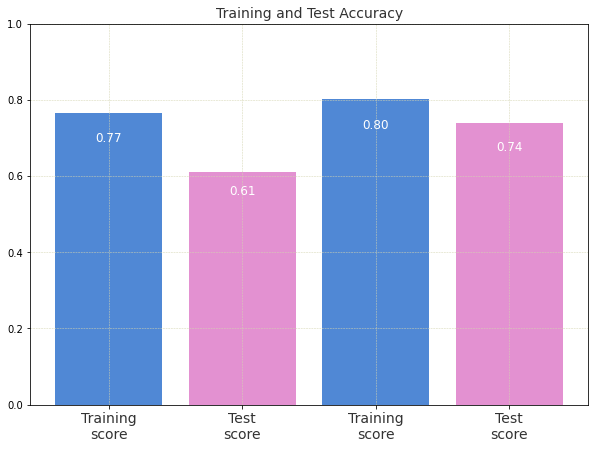

In [ ]:
scores = [knn.score(X_train, y_train), knn.score(X_test, y_test), knn_scaled.score(X_train_scaled, y_train), knn_scaled.score(X_test_scaled, y_test)]

plt.figure(figsize=(10,7))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
bars = plt.bar(np.arange(4), scores, color=['#5088D5','#E391D1','#5088D5','#E391D1'])
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), ha='center', color='w', fontsize=12)

plt.xticks([0,1,2,3], ['Training\nscore', 'Test\nscore','Training\nscore', 'Test\nscore'], alpha=0.8, fontsize=14)
plt.ylim(0.0,1.0)
plt.title('Training and Test Accuracy', alpha=0.8, fontsize=14)

In [ ]:
# โมเดลก่อนที่จะปรับสเกลมีความ overfit อยู่มาก
# โมเดลหลังจากปรับสเกลแล้วพบว่า ค่า accuracy ของ Trainig score และ Test set เพิ่มขึ้น
# -> model regularized มากขึ้น แต่ยัง overfit อยู่

##  เปรียบเทียบ Performace ของแต่ละ model หลังทำ  Feature Scaling ด้วย StandardScaler


In [ ]:
print('1.Logistic Regression Classifier Model after Feature Scaling')
print('Accuracy on training set: {:.2f}'
      .format(logreg_scaled.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.2f}\n'
      .format(logreg_scaled.score(X_test_scaled, y_test)))

print('2.Linear SVMs Classifier Model after Feature Scaling')
print('Accuracy on training set: {:.2f}'
      .format(svc_scaled.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.2f}\n'
      .format(svc_scaled.score(X_test_scaled, y_test)))

print('3.k-Nearest Neighbors Model after Feature Scaling')
print('Accuracy on training set: {:.2f}'
      .format(knn_scaled.score(X_train_scaled, y_train)))
print('Accuracy on test set: {:.2f}'
      .format(knn_scaled.score(X_test_scaled, y_test)))

1.Logistic Regression Classifier Model after Feature Scaling
Accuracy on training set: 0.78
Accuracy on test set: 0.76

2.Linear SVMs Classifier Model after Feature Scaling
Accuracy on training set: 0.78
Accuracy on test set: 0.78

3.k-Nearest Neighbors Model after Feature Scaling
Accuracy on training set: 0.80
Accuracy on test set: 0.74


In [ ]:
# Linear SVMs มีความ regularized มากที่สุด

Text(0.5, 1.0, 'Training and Test Accuracies')

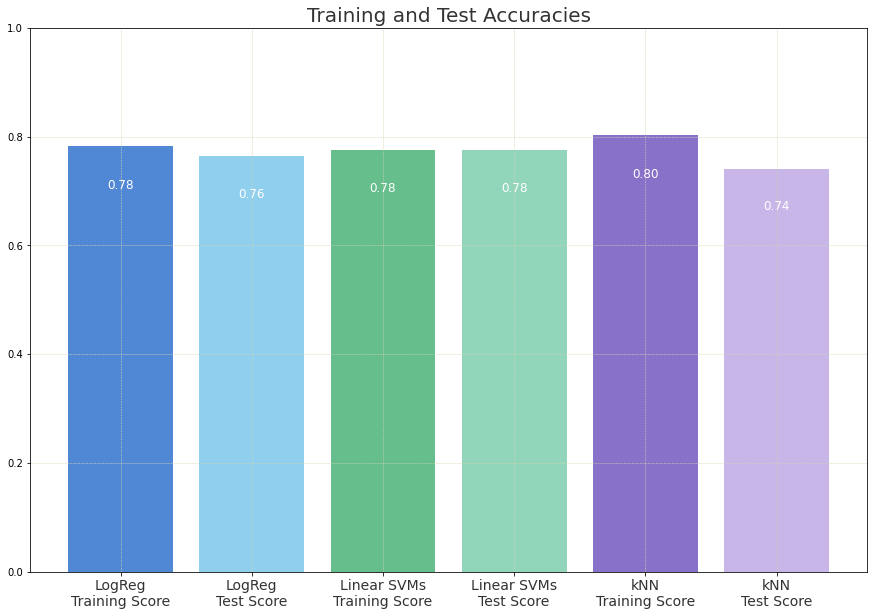

In [ ]:
scores = [logreg_scaled.score(X_train_scaled, y_train), logreg_scaled.score(X_test_scaled, y_test),
          svc_scaled.score(X_train_scaled, y_train), svc_scaled.score(X_test_scaled, y_test),
          knn_scaled.score(X_train_scaled, y_train), knn_scaled.score(X_test_scaled, y_test)]

plt.figure(figsize=(15,10))
plt.grid(True, color = "#D4D5B0", linewidth = "0.5", linestyle = "--")
bars = plt.bar(np.arange(6), scores, color=['#5088D5','#91CFEE','#65BE8C','#91D5BA','#8871C8','#C9B6E8'])
for bar in bars:
    height = bar.get_height()
    plt.gca().text(bar.get_x() + bar.get_width()/2, height*.90, '{0:.{1}f}'.format(height, 2), ha='center', color='w', fontsize=12)

plt.xticks([0,1,2,3,4,5], ['LogReg\nTraining Score', 'LogReg\nTest Score','Linear SVMs\nTraining Score', 'Linear SVMs\nTest Score','kNN\nTraining Score', 'kNN\nTest Score'], alpha=0.8, fontsize=14)
plt.ylim(0.0,1.0)
plt.title('Training and Test Accuracies', alpha=0.8, fontsize=20)

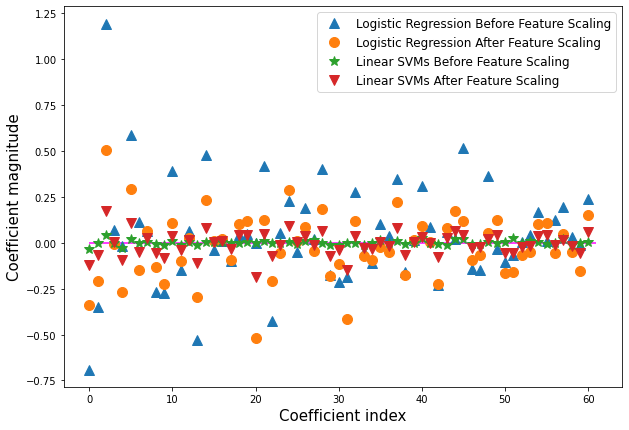

In [ ]:
#แสดงค่าน้ำหนักของแต่ละ feature(coefficient)ใน Logistic Regression และ Linear SVMs models ทั้งก่อนและหลังปรับสเกล

logreg_coef_ = logreg.coef_.reshape(61,)
logreg_coef_scaled = logreg_scaled.coef_.reshape(61,)
svc_coef_ = svc.coef_.reshape(61,)
svc_coef_scaled = svc_scaled.coef_.reshape(61,)

plt.figure(figsize=(10,7))
plt.plot(logreg_coef_, '^', label = 'Logistic Regression Before Feature Scaling', ms=10)
plt.plot(logreg_coef_scaled, 'o', label = 'Logistic Regression After Feature Scaling', ms=10)
plt.plot(svc_coef_, '*', label = 'Linear SVMs Before Feature Scaling', ms=10)
plt.plot(svc_coef_scaled, 'v', label = 'Linear SVMs After Feature Scaling', ms=10)

plt.hlines(0, 0, len(logreg_coef_), linestyles='solid', colors='magenta')

plt.xlabel("Coefficient index", fontsize = 15)
plt.ylabel("Coefficient magnitude", fontsize = 15)
plt.legend(fontsize = 12)


In [ ]:
# หลังจากปรับสเกลแล้วพบว่า Feature มีความ Normalized มากขึ้น

# **7. Tunning Parameters by Using GridSearchCV**

---

In [ ]:
from sklearn.model_selection import GridSearchCV

##  Logistic Regression with GridSearchCV

In [ ]:
# Tunning Parameters by using GridSearchCV
param_grid = {'C' : [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0, 50.0, 100.0]}

logreg_scaled = LogisticRegression(max_iter=5000)
logreg_cv = GridSearchCV(logreg_scaled, param_grid = param_grid)
logreg_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=5000, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0,
                               50.0, 100.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# แสดงผลลัพธ์ที่เกิดจากการ tunning parameter แต่ละตัว
grid_scores = pd.DataFrame(logreg_cv.cv_results_)
grid_scores = grid_scores.sort_values(by=['rank_test_score'])
grid_scores = (grid_scores.set_index(grid_scores["params"].apply(lambda x: "_".join(str(val) for val in x.values()))).rename_axis('param_grid'))
grid_scores[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
param_grid,,,,
5.0,{'C': 5.0},1,0.754667,0.035125
10.0,{'C': 10.0},1,0.754667,0.035125
50.0,{'C': 50.0},3,0.753333,0.034769
100.0,{'C': 100.0},3,0.753333,0.034769
1.0,{'C': 1.0},5,0.753333,0.033731
0.5,{'C': 0.5},6,0.750667,0.031440
0.1,{'C': 0.1},7,0.748000,0.026466
0.01,{'C': 0.01},8,0.741333,0.028721
0.0001,{'C': 0.0001},9,0.692000,0.002667


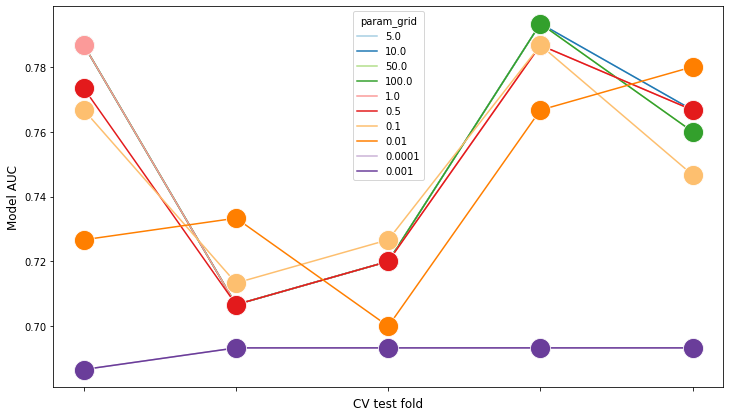

In [ ]:
model_scores = grid_scores.filter(regex=r'split\d*_test_score')

fig, ax = plt.subplots(figsize=(12,7))
sns.lineplot(data=model_scores.transpose(),dashes=False, palette='Paired', marker='o', alpha=1, ax=ax, ms=20)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

In [ ]:
# แสดง hyperparameters ที่ดีที่สุดหลังจาก tunning ด้วย GridSearchCV
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# แสดงค่า score ที่ดีที่สุดจาก hyperparameters
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 5.0}
accuracy : 0.7546666666666666


In [ ]:
# ทดสอบโมเดลกับค่า hyperparameters
logreg_scaled = LogisticRegression(C = 0.1, max_iter= 5000)
logreg_scaled.fit(X_train_scaled, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(logreg_scaled.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(logreg_scaled.score(X_test_scaled, y_test)))

Accuracy of Logistic regression classifier on training set: 0.79
Accuracy of Logistic regression classifier on test set: 0.77


In [ ]:
# ค่า accuracy ของ Training set และ Test set เพิ่มขึ้น -> โมเดลมีความ regularized เพิ่มขึ้นเล็กน้อย

##  Linear SVMs with GridSearchCV

In [ ]:
# Tunning Parameters by using GridSearchCV
param_grid = {'C' : [0.001, 0.005, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]}

svc_scaled = LinearSVC(max_iter=300000)
svc_cv = GridSearchCV(svc_scaled, param_grid = param_grid)
svc_cv.fit(X_train_scaled, y_train)


GridSearchCV(cv=None, error_score=nan,
             estimator=LinearSVC(C=1.0, class_weight=None, dual=True,
                                 fit_intercept=True, intercept_scaling=1,
                                 loss='squared_hinge', max_iter=300000,
                                 multi_class='ovr', penalty='l2',
                                 random_state=None, tol=0.0001, verbose=0),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.005, 0.01, 0.1, 0.5, 1.0, 5.0, 10.0]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# แสดงผลลัพธ์ที่เกิดจากการ tunning parameter แต่ละตัว
grid_scores = pd.DataFrame(svc_cv.cv_results_)
grid_scores = grid_scores.sort_values(by=['rank_test_score'])
grid_scores = (grid_scores.set_index(grid_scores["params"].apply(lambda x: "_".join(str(val) for val in x.values()))).rename_axis('param_grid'))
grid_scores[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
param_grid,,,,
0.01,{'C': 0.01},1,0.745333,0.027455
0.1,{'C': 0.1},1,0.745333,0.031098
0.005,{'C': 0.005},3,0.745333,0.024368
0.5,{'C': 0.5},4,0.744000,0.031721
1.0,{'C': 1.0},4,0.744000,0.031721
5.0,{'C': 5.0},4,0.744000,0.031721
10.0,{'C': 10.0},4,0.744000,0.031721
0.001,{'C': 0.001},8,0.729333,0.022940


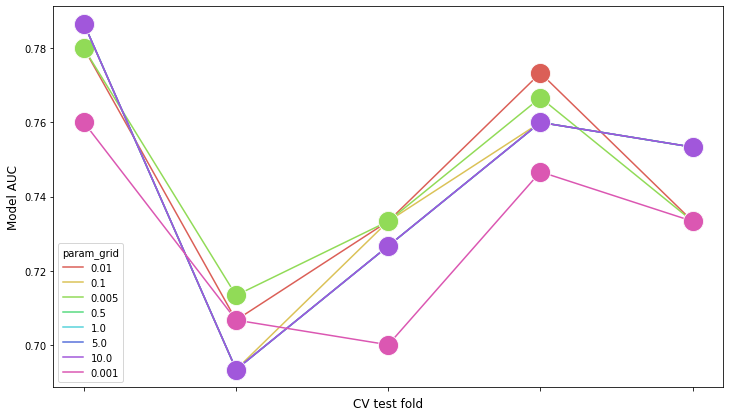

In [ ]:
model_scores = grid_scores.filter(regex=r'split\d*_test_score')

fig, ax = plt.subplots(figsize=(12,7))
sns.lineplot(data=model_scores.transpose(),dashes=False, palette='hls', marker='o', alpha=1, ax=ax, ms=20)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

In [ ]:
# แสดง hyperparameters ที่ดีที่สุดหลังจาก tunning ด้วย GridSearchCV
print("tuned hpyerparameters :(best parameters) ",svc_cv.best_params_)
# แสดงค่า score ที่ดีที่สุดจาก hyperparameters
print("accuracy :",svc_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01}
accuracy : 0.7453333333333334


In [ ]:
# ทดสอบโมเดลกับค่า hyperparameters
svc_scaled = LinearSVC(C = 0.001, max_iter= 300000)
svc_scaled.fit(X_train_scaled, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(svc_scaled.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(svc_scaled.score(X_test_scaled, y_test)))

Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.78


In [ ]:
# Linear SVMs ที่มีความ Normalization และมีการใช้ hyparameters ที่ดีที่สุด
# ค่า accuracy เท่าเดิม -> model regularized แต่ค่ายังไม่ดีพอ

##  k-Nearest Neighbors with GridSearchCV

In [ ]:
# Tunning Parameters by using GridSearchCV
param_grid = {'n_neighbors' : np.arange(1,21)}

knn_cv = GridSearchCV(knn_scaled, param_grid = param_grid)
knn_cv.fit(X_train_scaled, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
# แสดงผลลัพธ์ที่เกิดจากการ tunning parameter แต่ละตัว
grid_scores = pd.DataFrame(knn_cv.cv_results_)
grid_scores = grid_scores.sort_values(by=['rank_test_score'])
grid_scores = (grid_scores.set_index(grid_scores["params"].apply(lambda x: "_".join(str(val) for val in x.values()))).rename_axis('param_grid'))
grid_scores[['params', 'rank_test_score', 'mean_test_score', 'std_test_score']]

,params,rank_test_score,mean_test_score,std_test_score
param_grid,,,,
12,{'n_neighbors': 12},1,0.736000,0.025854
14,{'n_neighbors': 14},2,0.734667,0.017588
16,{'n_neighbors': 16},3,0.729333,0.021746
11,{'n_neighbors': 11},4,0.724000,0.024074
20,{'n_neighbors': 20},5,0.721333,0.027777
13,{'n_neighbors': 13},5,0.721333,0.014236
19,{'n_neighbors': 19},7,0.718667,0.028410
15,{'n_neighbors': 15},8,0.718667,0.017075
7,{'n_neighbors': 7},8,0.718667,0.036612


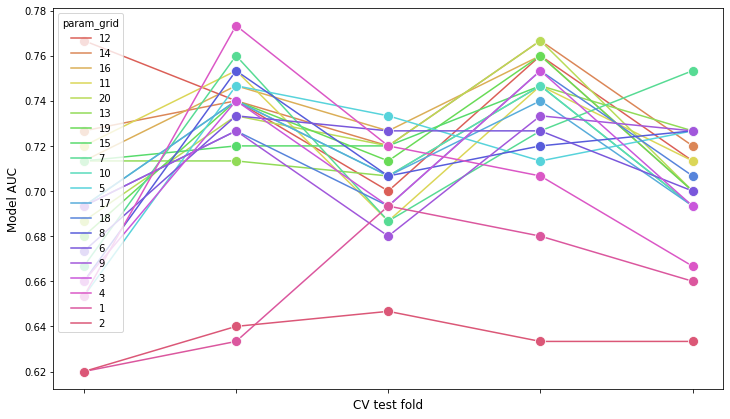

In [ ]:
model_scores = grid_scores.filter(regex=r'split\d*_test_score')

fig, ax = plt.subplots(figsize=(12,7))
sns.lineplot(data=model_scores.transpose(),dashes=False, palette='hls', marker='o', alpha=1, ax=ax, ms=10)
ax.set_xlabel("CV test fold", size=12, labelpad=10)
ax.set_ylabel("Model AUC", size=12)
ax.tick_params(bottom=True, labelbottom=False)
plt.show()

In [ ]:
# แสดง hyperparameters ที่ดีที่สุดหลังจาก tunning ด้วย GridSearchCV
print("tuned hpyerparameters :(best parameters) ", knn_cv.best_params_)
# แสดงค่า score ที่ดีที่สุดจาก hyperparameters
print("accuracy :", knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'n_neighbors': 12}
accuracy : 0.736


In [ ]:
# ทดสอบโมเดลกับค่า hyperparameters
knn_scaled = KNeighborsClassifier(n_neighbors = 12)
knn_scaled.fit(X_train_scaled, y_train)
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
      .format(knn_scaled.score(X_train_scaled, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
      .format(knn_scaled.score(X_test_scaled, y_test)))

Accuracy of Logistic regression classifier on training set: 0.78
Accuracy of Logistic regression classifier on test set: 0.76


In [ ]:
# ค่า accuracy ของ Training set ลดลง แต่ของ Test set เพิ่มขึ้น -> โมเดลมีความ regularized เพิ่มขึ้น ไม่ overfit

# **8. 20-Coefficient of the best Estimated Hyper-parameters from GridSearchCV**

---

##  The best estimated hyper-parameters of Logistic Regression from GridSearchCV

In [ ]:
#แสดงค่า estimator ที่ดีที่สุดของ Logistic regression หลังจากtunning parameters
print(logreg_cv.best_estimator_)

print('the best linear model intercept (b): {}'.format(logreg_cv.best_estimator_.intercept_))
print('the most 20 important linear model coeffs (w): \n{}'.format(logreg_cv.best_estimator_.coef_))

LogisticRegression(C=5.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=5000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
the best linear model intercept (b): [1.22737521]
the most 20 important linear model coeffs (w): 
[[-0.34215442 -0.20920307  0.51059289 -0.00969078 -0.26986725  0.29535283
  -0.1496837   0.06574247 -0.13221779 -0.22487195  0.10779126 -0.09832058
   0.02637331 -0.29681727  0.23458197  0.01108479  0.02389221 -0.09261939
   0.10512164  0.11954259 -0.53121426  0.12610792 -0.20737762 -0.05827338
   0.2962521   0.01132965  0.08637449 -0.04336136  0.18632316 -0.18513388
  -0.11740779 -0.42278421  0.12208163 -0.07296698 -0.0956611  -0.02328846
  -0.04990298  0.22646239 -0.1796822   0.0130203   0.09161127  0.00556141
  -0.22958489  0.0862607   0.17308482  0.12080047 -0.0933

In [ ]:
# แสดงค่า coefficients ที่สำคัญที่สุด 20 ตัวของโมเดล Logistic Regression ที่ปรับจูนพารามิเตอร์และปรับสเกลแล้ว
logreg_coef = logreg_cv.best_estimator_.coef_.reshape(61,)
important_logreg_coef = sorted(logreg_coef, reverse=True)
important_logreg_coef = important_logreg_coef[:20]
important_logreg_coef

[0.5105928914278054,
 0.2962521019576038,
 0.2953528346922525,
 0.23458196682926383,
 0.22646239202496654,
 0.1863231592855252,
 0.17308482082684806,
 0.1542334469864428,
 0.12942147887417285,
 0.12610792250241248,
 0.12208163181657489,
 0.12080047025146853,
 0.11954258949086455,
 0.11322503514240391,
 0.10834529766647978,
 0.10779125653699574,
 0.10512164383228506,
 0.0916112663759718,
 0.08637449370493057,
 0.08626069596429754]

##  The best estimated hyper-parameters of Linear SVMs from GridSearchCV

In [ ]:
#แสดงค่า estimator ที่ดีที่สุดของ Linear SVMs หลังจากtunning parameters
print(svc_cv.best_estimator_)

print('the best linear model intercept (b): {}'.format(svc_cv.best_estimator_.intercept_))
print('the most 20 important linear model coeffs (w): \n{}'.format(svc_cv.best_estimator_.coef_))

LinearSVC(C=0.01, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=300000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)
the best linear model intercept (b): [0.38886758]
the most 20 important linear model coeffs (w): 
[[-0.11454478 -0.06142787  0.15663948  0.01006841 -0.09461326  0.09117787
  -0.03899849  0.02306339 -0.05471913 -0.07622453  0.03574358 -0.03802306
   0.01226929 -0.09607804  0.07306553  0.00539283  0.00670134 -0.03047785
   0.03513941  0.03745366 -0.15149583  0.04440151 -0.06449667 -0.00640631
   0.07246707  0.00177977  0.03325843 -0.01183633  0.05458651 -0.06015448
  -0.04089546 -0.11992209  0.03264866 -0.02459261 -0.02914271  0.00477586
  -0.01444093  0.07240972 -0.05965732  0.00225936  0.02904793 -0.00105175
  -0.06188175  0.02125799  0.05380081  0.03732777 -0.02708565 -0.02380503
   0.02204753  0.02793252 -0.04845348 -0.04180426 -0.01953403 -0.01020169
   

In [ ]:
# แสดงค่า coefficients ที่สำคัญที่สุด 20 ตัวของโมเดล Linear SVMs ที่ปรับจูนพารามิเตอร์และปรับสเกลแล้ว
svc_coef = svc_cv.best_estimator_.coef_.reshape(61,)
important_svc_coef = sorted(svc_coef, reverse=True)
important_svc_coef = important_svc_coef[:20]
important_svc_coef

[0.15663947818229898,
 0.09117787193396522,
 0.07306552560850406,
 0.07246706926127176,
 0.07240971888059308,
 0.05458650852483045,
 0.05380080976944297,
 0.047704940399702335,
 0.04440150870883281,
 0.0374536565884978,
 0.037327769011176695,
 0.03574358289543333,
 0.0351394097812503,
 0.03325843468504736,
 0.0326486637356385,
 0.029109575384496607,
 0.029047928241906114,
 0.027932521723947355,
 0.026827164222353383,
 0.023063389257292066]

##  Comparison of the best 20-Coefficients between Logistic Regression with C = 0.1 and Linear SVMs with C = 0.001

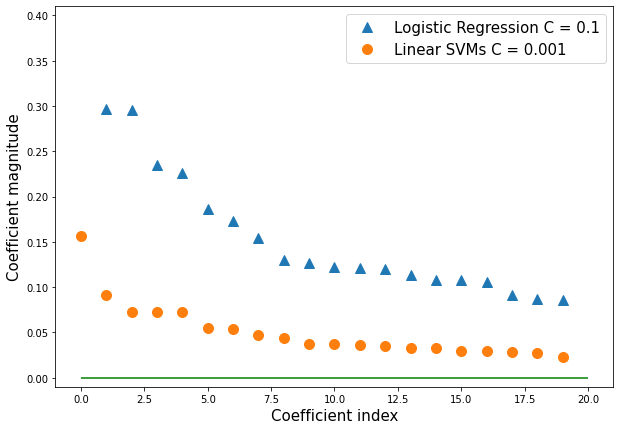

In [ ]:
#แสดงค่า coefficient ที่สำคัญ 20 ตัวของทั้ง 2 linear models
plt.figure(figsize=(10,7))
plt.plot(important_logreg_coef, '^', label = 'Logistic Regression C = 0.1', ms=10)
plt.plot(important_svc_coef, 'o', label = 'Linear SVMs C = 0.001', ms=10)

plt.hlines(0, 0, len(important_logreg_coef), linestyles='solid', colors='g')

plt.xlabel("Coefficient index", fontsize = 15)
plt.ylabel("Coefficient magnitude", fontsize = 15)
plt.ylim(-0.01, 0.41)
plt.legend(fontsize = 15)

In [ ]:
# ค่า coeffients ของทั้ง 2 model มีความ regularized